In [1]:
from tensorflow.python.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [3]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(72, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 72)                18504     
Total params: 15,913,096
Trainable params: 15,913,096
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_dir='C:\\Users\\Raheel\\fruits_classification\\fruits-360_dataset\\fruits-360\\Training'

In [7]:
validation_dir='C:\\Users\\Raheel\\fruits_classification\\fruits-360_dataset\\fruits-360\\Test'

In [8]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(100, 100),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32, shuffle=False)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 36117 images belonging to 72 classes.
Found 12132 images belonging to 72 classes.
Epoch 1/100
100/100 [==============================] - 35s 352ms/step - loss: 3.5212 - categorical_accuracy: 0.1584 - val_loss: 2.6239 - val_categorical_accuracy: 0.2344
Epoch 2/100
100/100 [==============================] - 31s 305ms/step - loss: 1.3816 - categorical_accuracy: 0.5968 - val_loss: 1.2810 - val_categorical_accuracy: 0.5763
Epoch 3/100
100/100 [==============================] - 29s 294ms/step - loss: 0.6363 - categorical_accuracy: 0.7997 - val_loss: 0.6383 - val_categorical_accuracy: 0.7256
Epoch 4/100
100/100 [==============================] - 29s 291ms/step - loss: 0.3951 - categorical_accuracy: 0.8706 - val_loss: 1.1872 - val_categorical_accuracy: 0.6306
Epoch 5/100
100/100 [==============================] - 29s 292ms/step - loss: 0.2864 - categorical_accuracy: 0.9053 - val_loss: 0.5291 - val_categorical_accuracy: 0.8163
Epoch 6/100
100/100 [==============================] - 29s 290

100/100 [==============================] - 29s 287ms/step - loss: 0.0833 - categorical_accuracy: 0.9728 - val_loss: 0.1010 - val_categorical_accuracy: 0.9613
Epoch 49/100
100/100 [==============================] - 29s 286ms/step - loss: 0.0687 - categorical_accuracy: 0.9778 - val_loss: 0.0248 - val_categorical_accuracy: 0.9975
Epoch 50/100
100/100 [==============================] - 29s 285ms/step - loss: 0.0564 - categorical_accuracy: 0.9791 - val_loss: 0.0488 - val_categorical_accuracy: 0.9950
Epoch 51/100
100/100 [==============================] - 29s 287ms/step - loss: 0.0748 - categorical_accuracy: 0.9797 - val_loss: 0.2132 - val_categorical_accuracy: 0.9619
Epoch 52/100
100/100 [==============================] - 29s 286ms/step - loss: 0.0605 - categorical_accuracy: 0.9797 - val_loss: 0.0770 - val_categorical_accuracy: 0.9675
Epoch 53/100
100/100 [==============================] - 29s 287ms/step - loss: 0.0864 - categorical_accuracy: 0.9697 - val_loss: 0.3419 - val_categorical_accu

Epoch 96/100
100/100 [==============================] - 29s 286ms/step - loss: 0.0809 - categorical_accuracy: 0.9744 - val_loss: 0.3451 - val_categorical_accuracy: 0.8900
Epoch 97/100
100/100 [==============================] - 29s 285ms/step - loss: 0.0725 - categorical_accuracy: 0.9776 - val_loss: 0.0259 - val_categorical_accuracy: 0.9925
Epoch 98/100
100/100 [==============================] - 28s 285ms/step - loss: 0.0534 - categorical_accuracy: 0.9828 - val_loss: 0.0301 - val_categorical_accuracy: 0.9881
Epoch 99/100
100/100 [==============================] - 29s 286ms/step - loss: 0.0318 - categorical_accuracy: 0.9859 - val_loss: 0.0970 - val_categorical_accuracy: 0.9650
Epoch 100/100
100/100 [==============================] - 29s 285ms/step - loss: 0.0191 - categorical_accuracy: 0.9900 - val_loss: 0.0069 - val_categorical_accuracy: 0.9994


In [10]:
import matplotlib.pyplot as plt

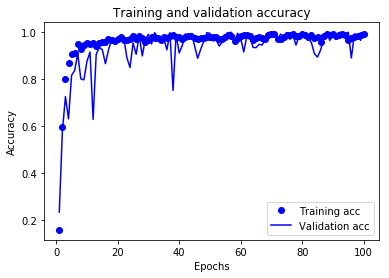

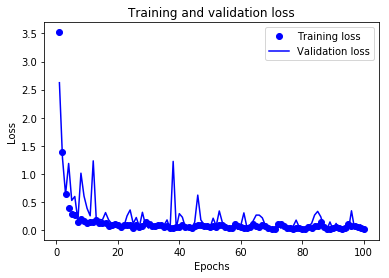

In [11]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_using vgg16_transfer learning_data augmentation4a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_using vgg16_transfer learning_data augmentation4b',format='png')
plt.show()

In [12]:
steps_test=12132/32

In [13]:
print(steps_test)

379.125


In [14]:
result = model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 99.27%
